### Determining the optimal number of hidden layers and neurons for an Artificial Neural Network (ANN) 
This can be challenging and often requires experimentation. However, there are some guidelines and methods that can help you in making an informed decision:

- Start Simple: Begin with a simple architecture and gradually increase complexity if needed.
- Grid Search/Random Search: Use grid search or random search to try different architectures.
- Cross-Validation: Use cross-validation to evaluate the performance of different architectures.
- Heuristics and Rules of Thumb: Some heuristics and empirical rules can provide starting points, such as:
  -    The number of neurons in the hidden layer should be between the size of the input layer and the size of the output layer.
  -  A common practice is to start with 1-2 hidden layers.

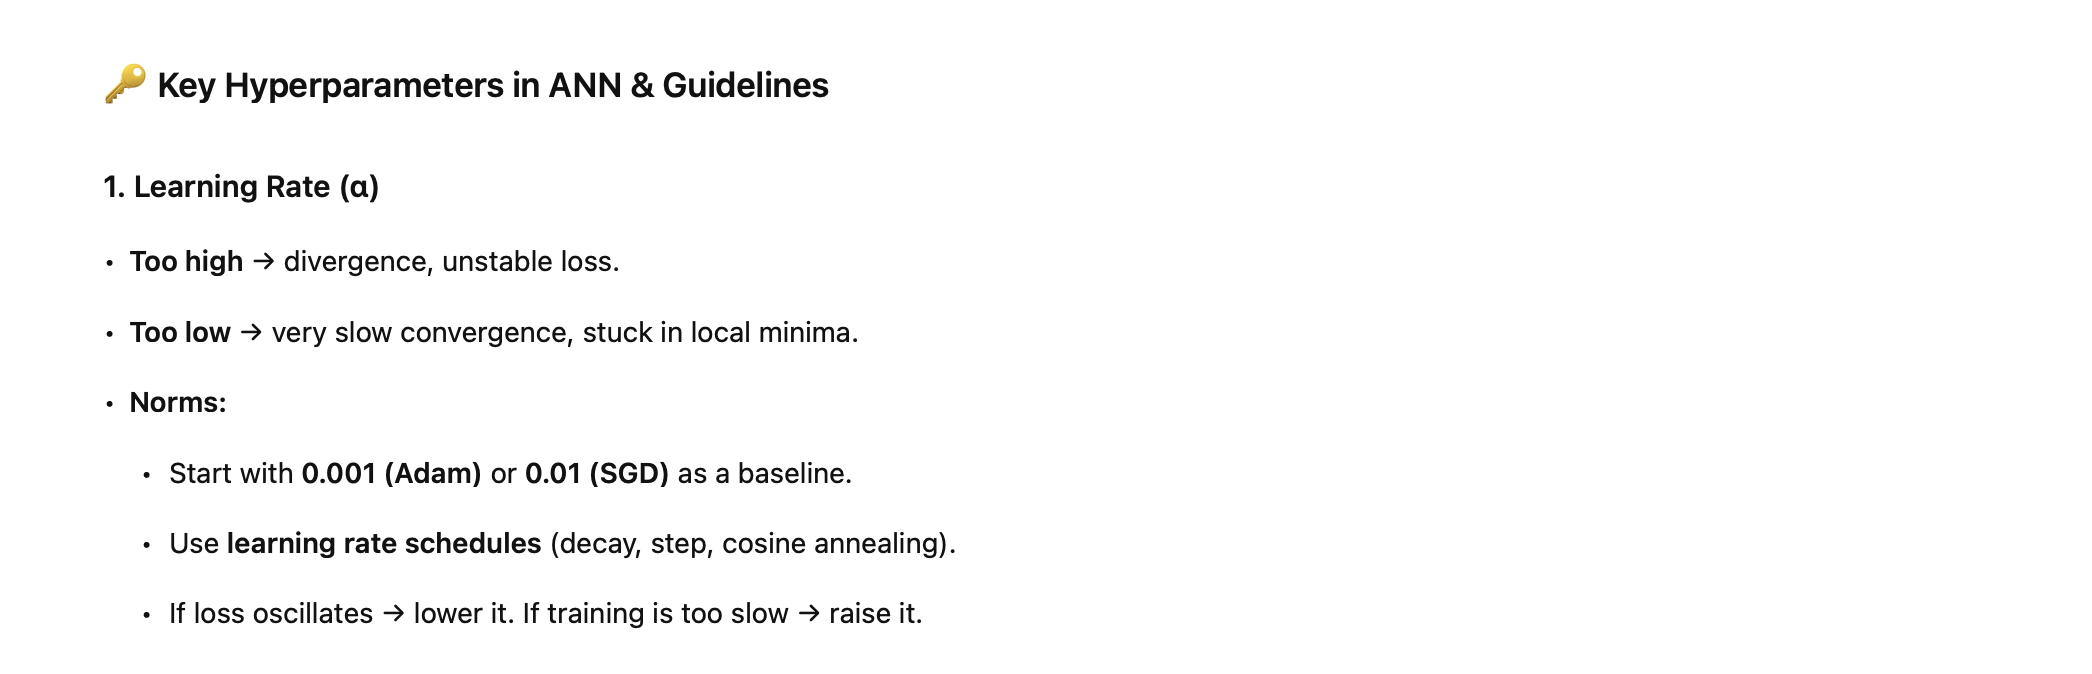

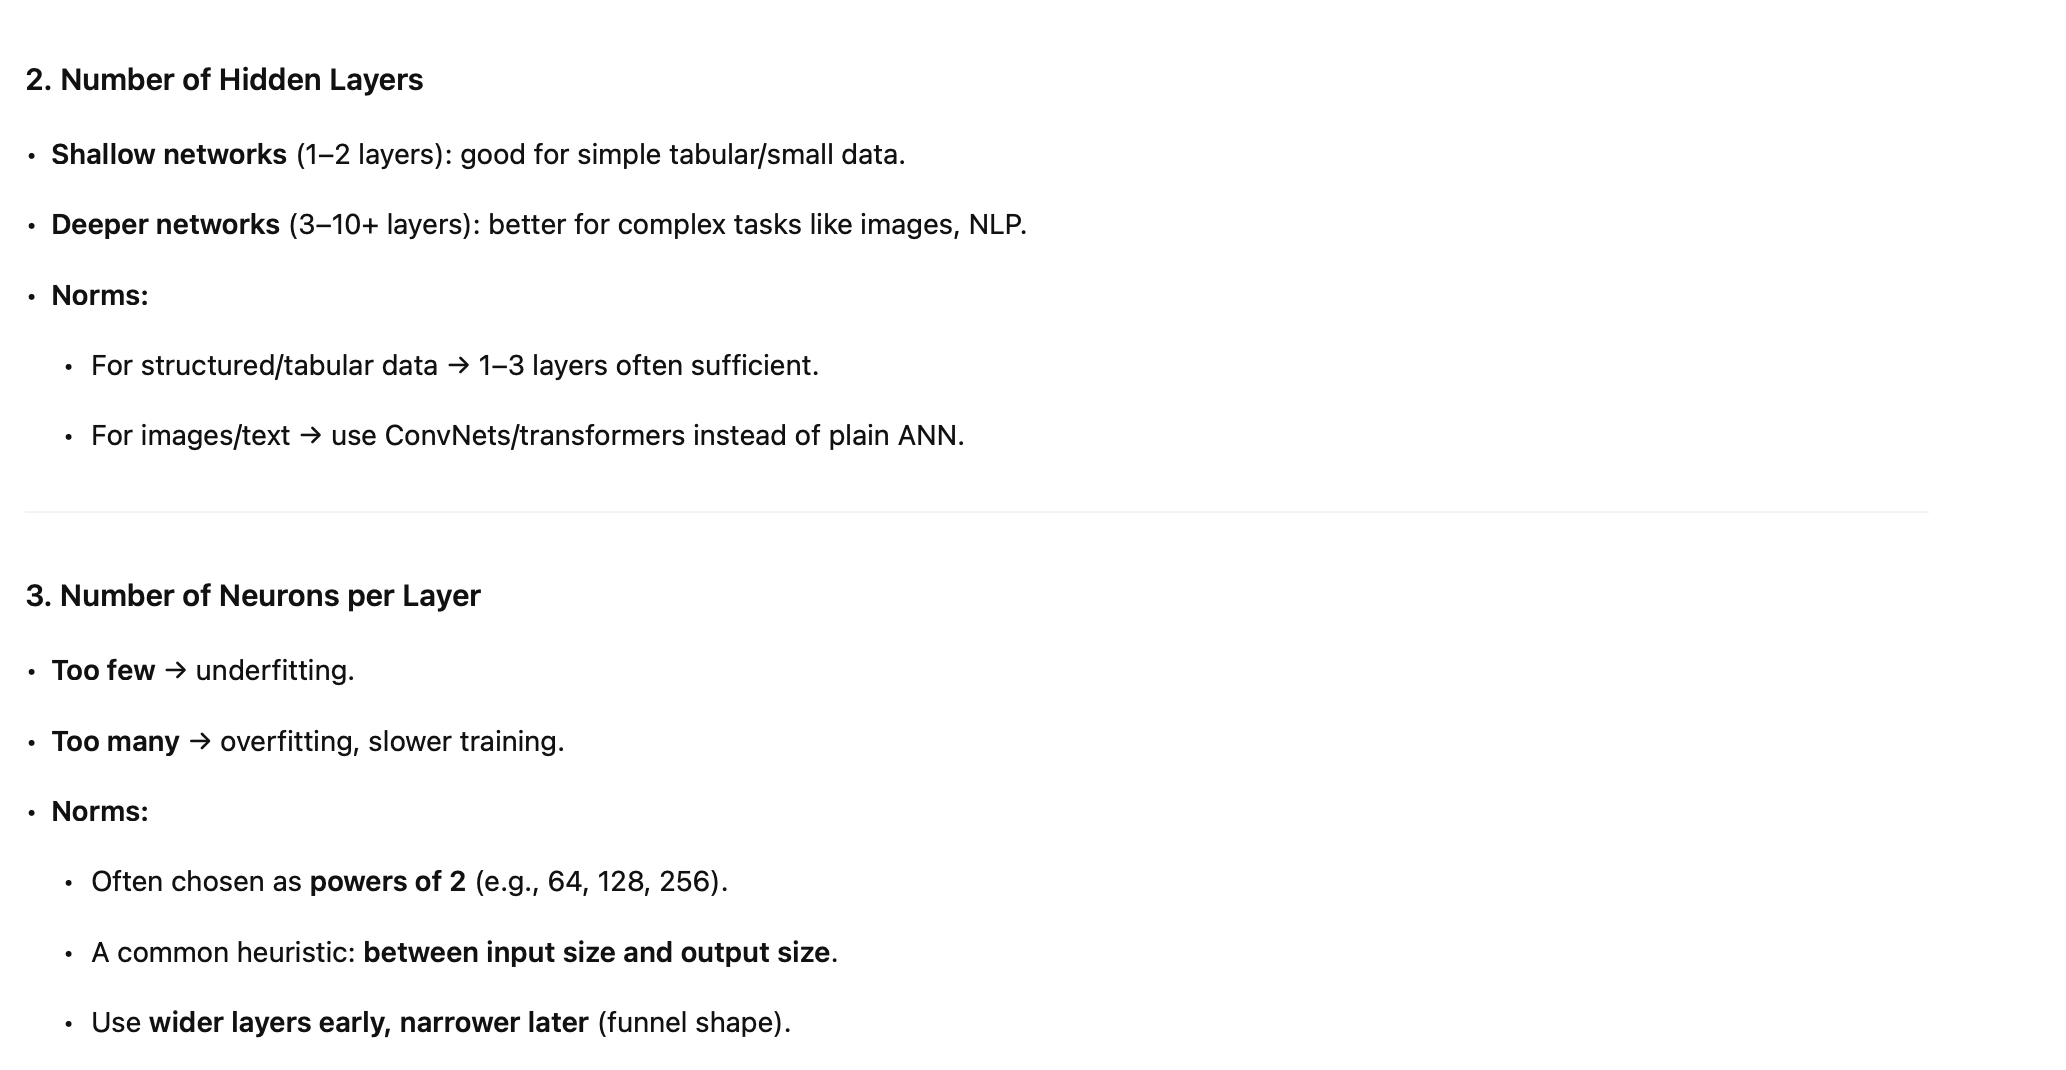

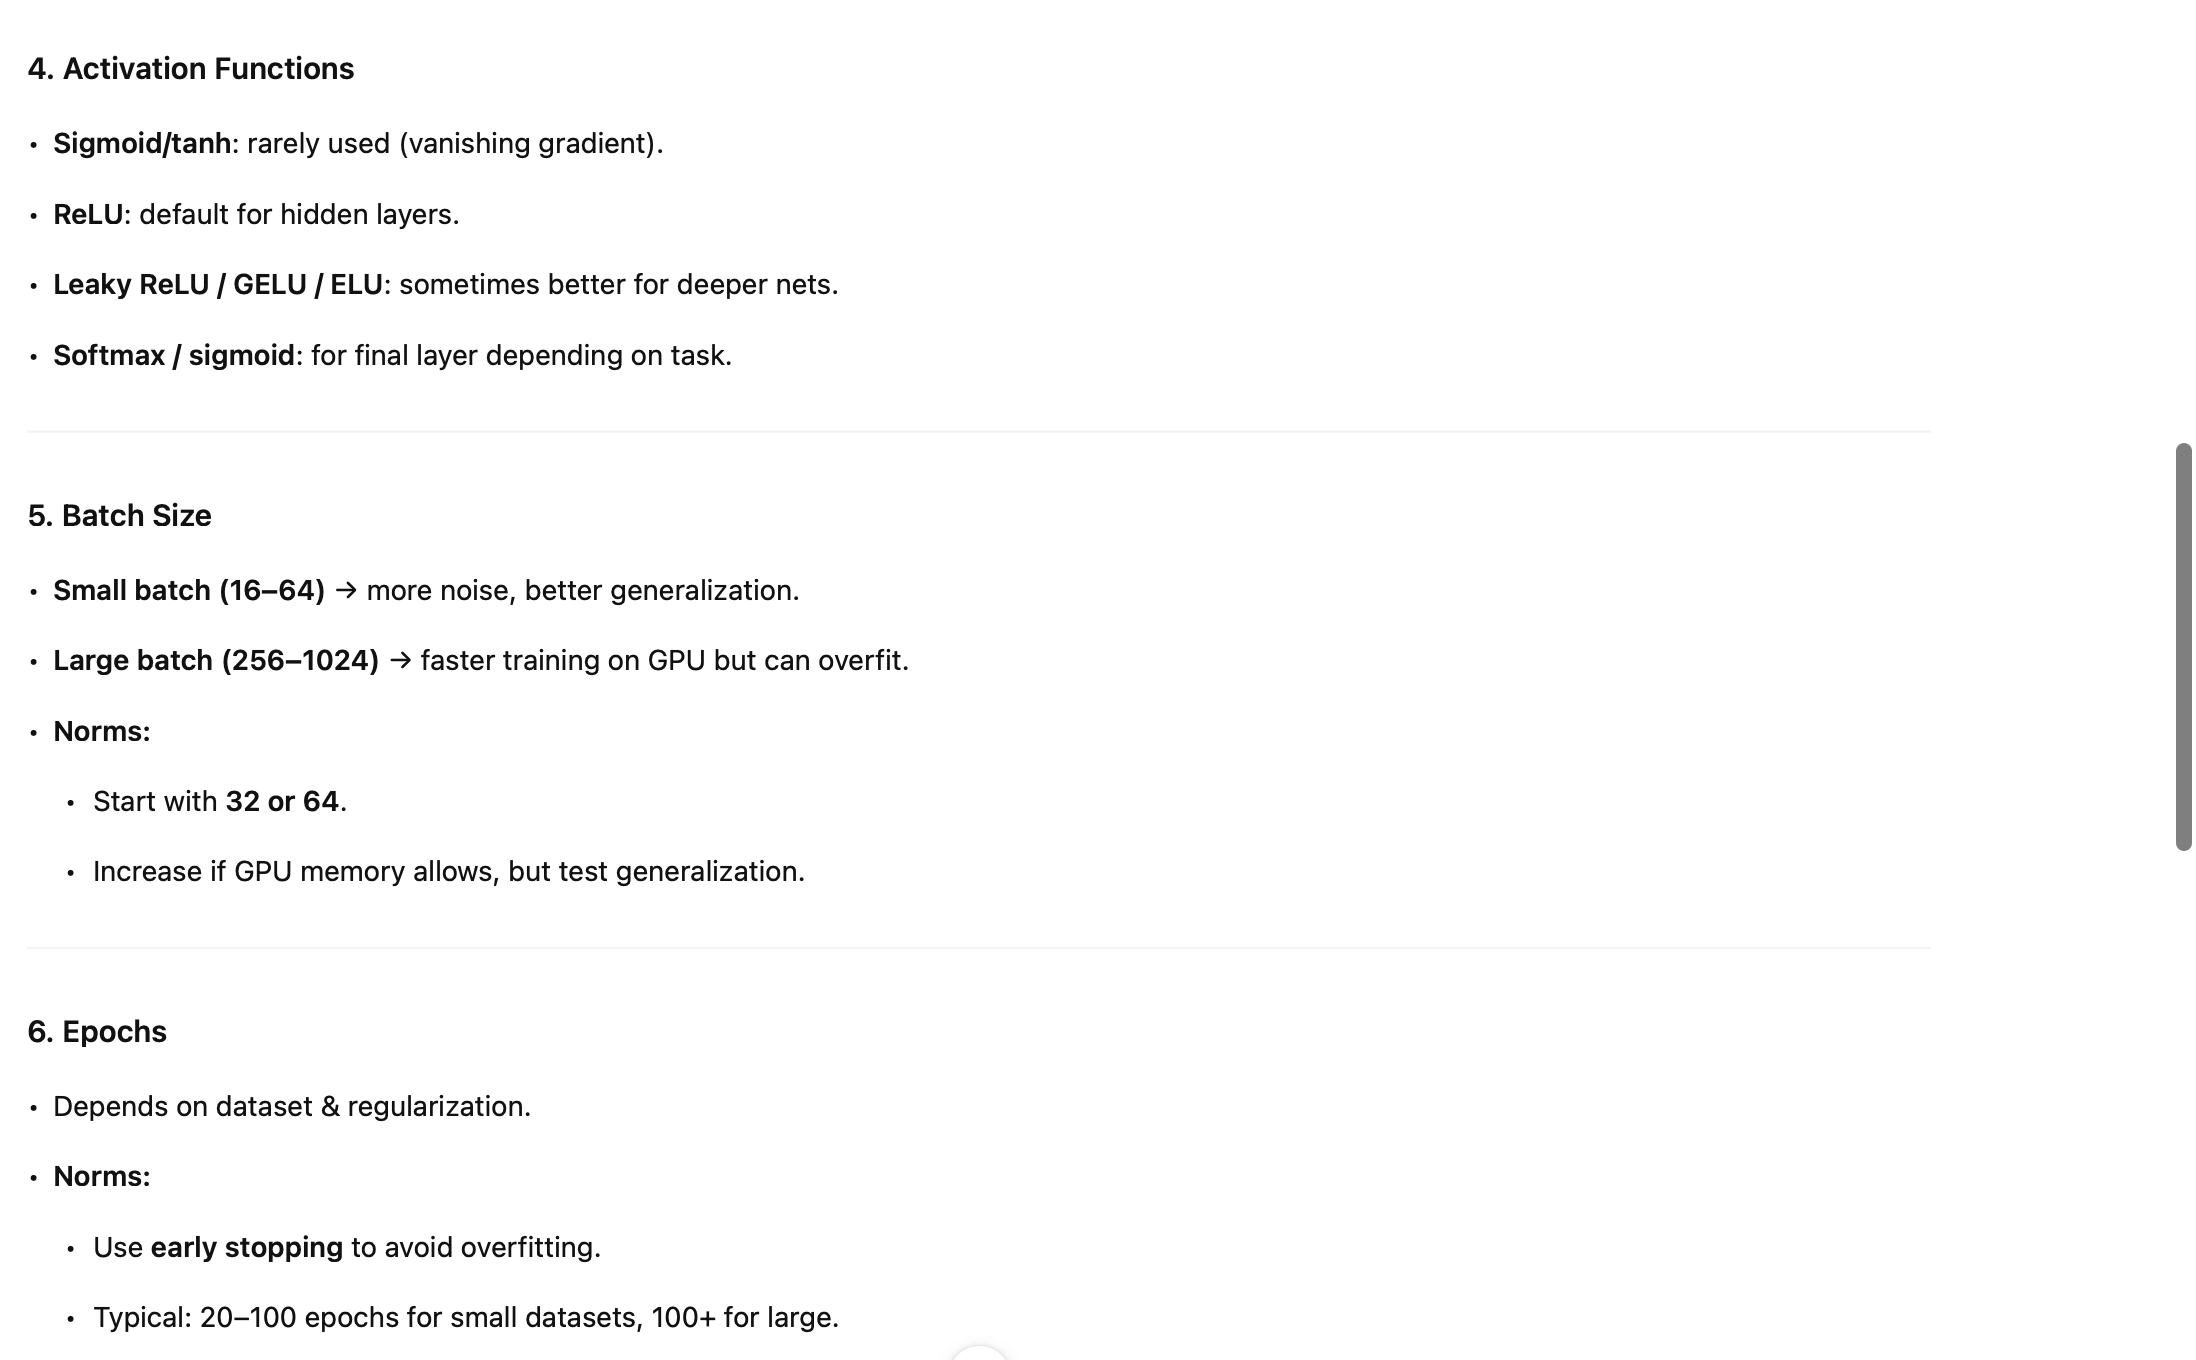

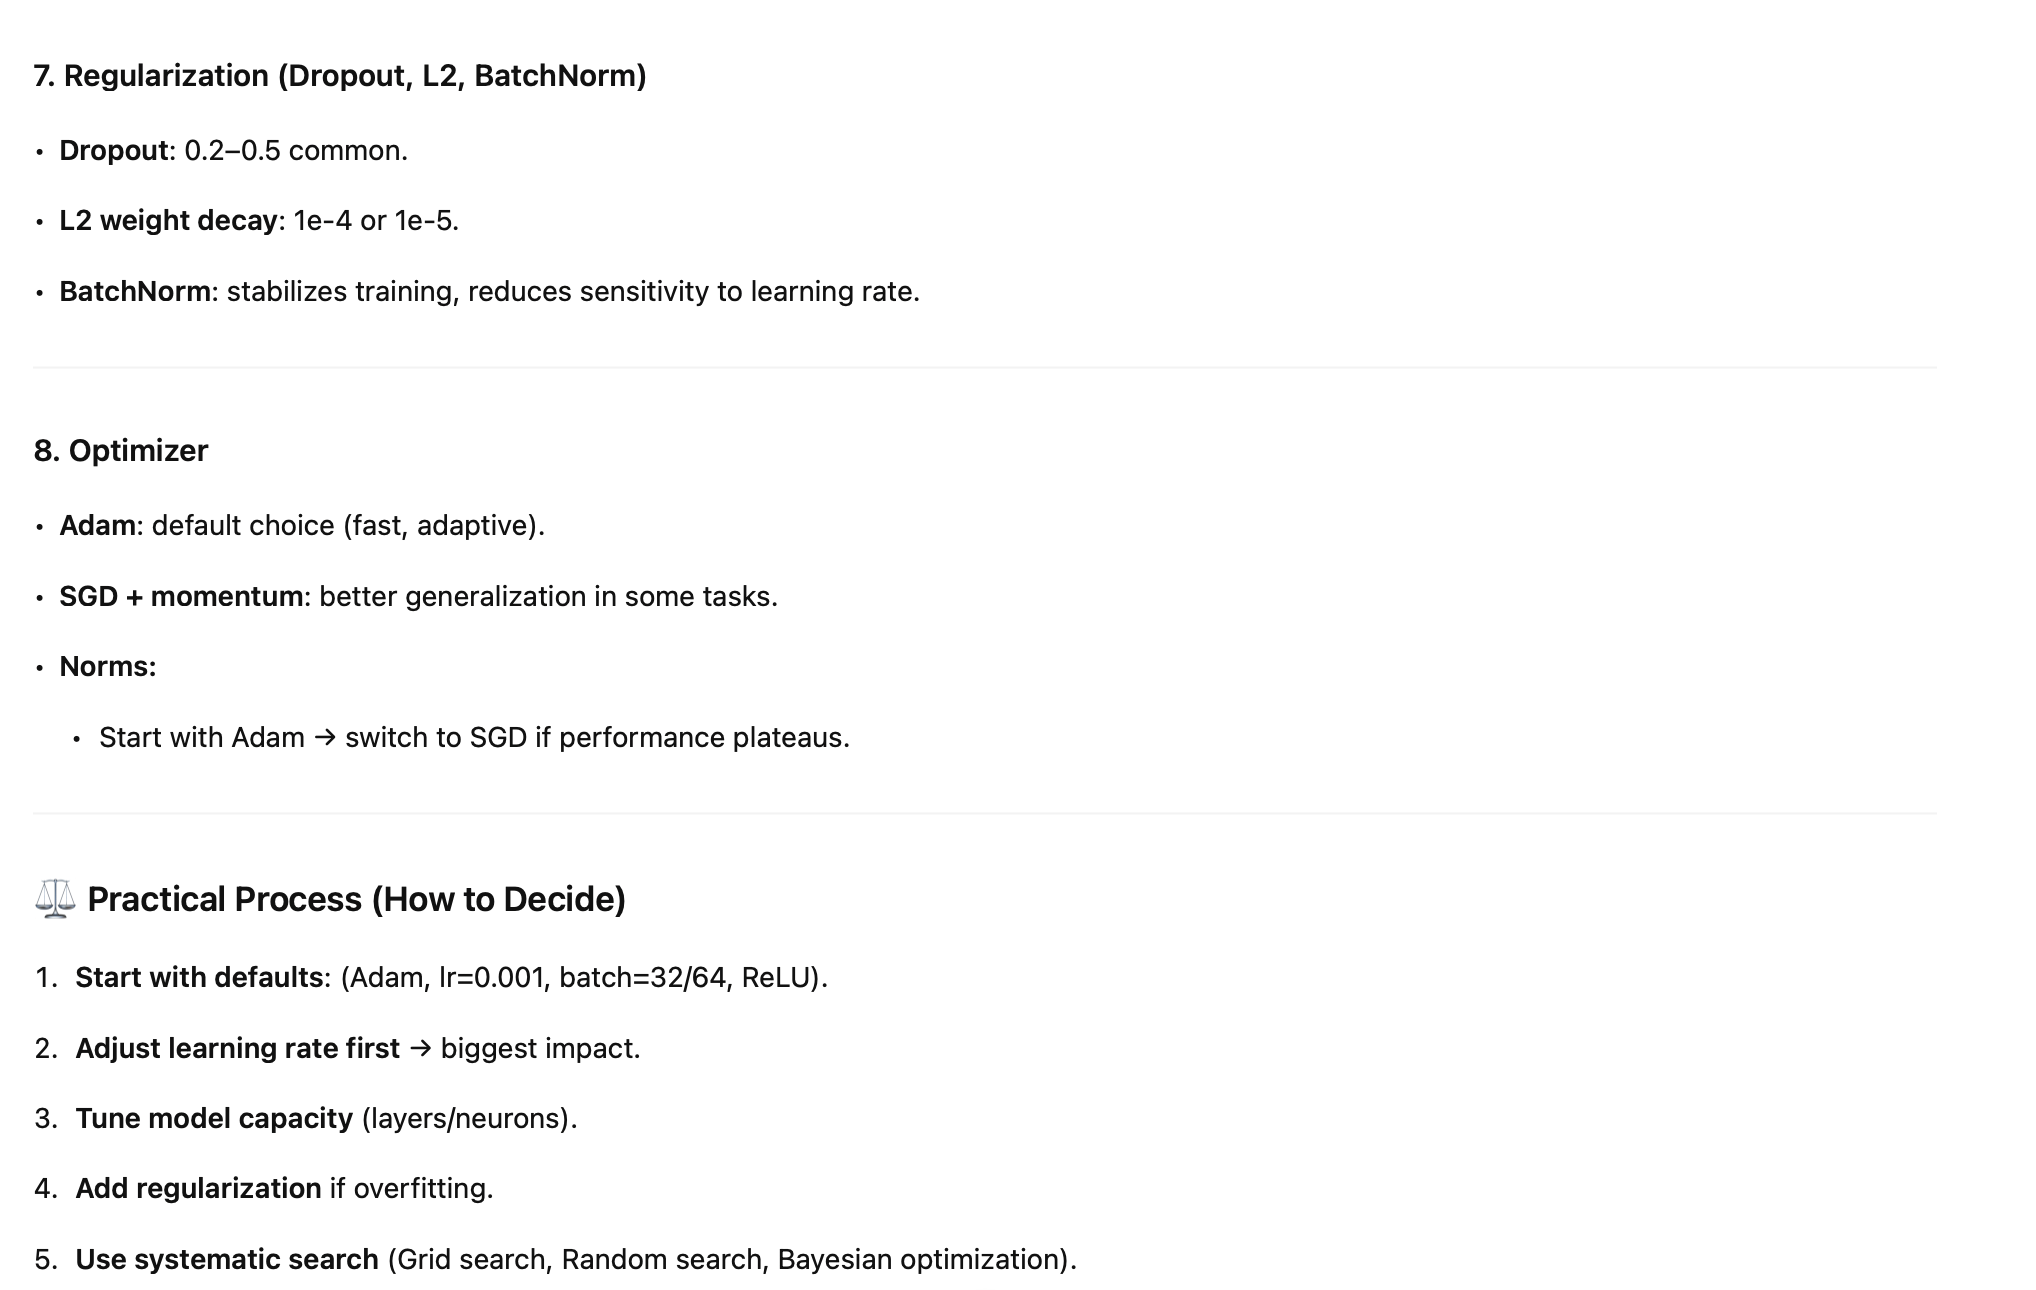

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow.keras import Sequential,Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import pickle

In [4]:
data=pd.read_csv('Churn_Modelling.csv')
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])

onehot_encoder_geo = OneHotEncoder(handle_unknown='ignore')
geo_encoded = onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=onehot_encoder_geo.get_feature_names_out(['Geography']))

data = pd.concat([data.drop('Geography', axis=1), geo_encoded_df], axis=1)

X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save encoders and scaler for later use
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('onehot_encoder_geo.pkl', 'wb') as file:
    pickle.dump(onehot_encoder_geo, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [5]:
## Define a function to create the model and try different parameters(KerasClassifier)

def create_model(neurons=32,layers=1):
    model=Sequential()
    model.add(Input(shape=(X_train.shape[1],)))   # 👈 first define input layer
    model.add(Dense(neurons, activation="relu"))  # 👈 then hidden layer
    for _ in range(layers-1):
        model.add(Dense(neurons,activation='relu'))

    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

    return model



In [6]:
## Create a Keras classifier
model=KerasClassifier(layers=1,neurons=32,model=create_model,verbose=1) #Now model is not just a Keras model – it behaves like a scikit-learn classifier.

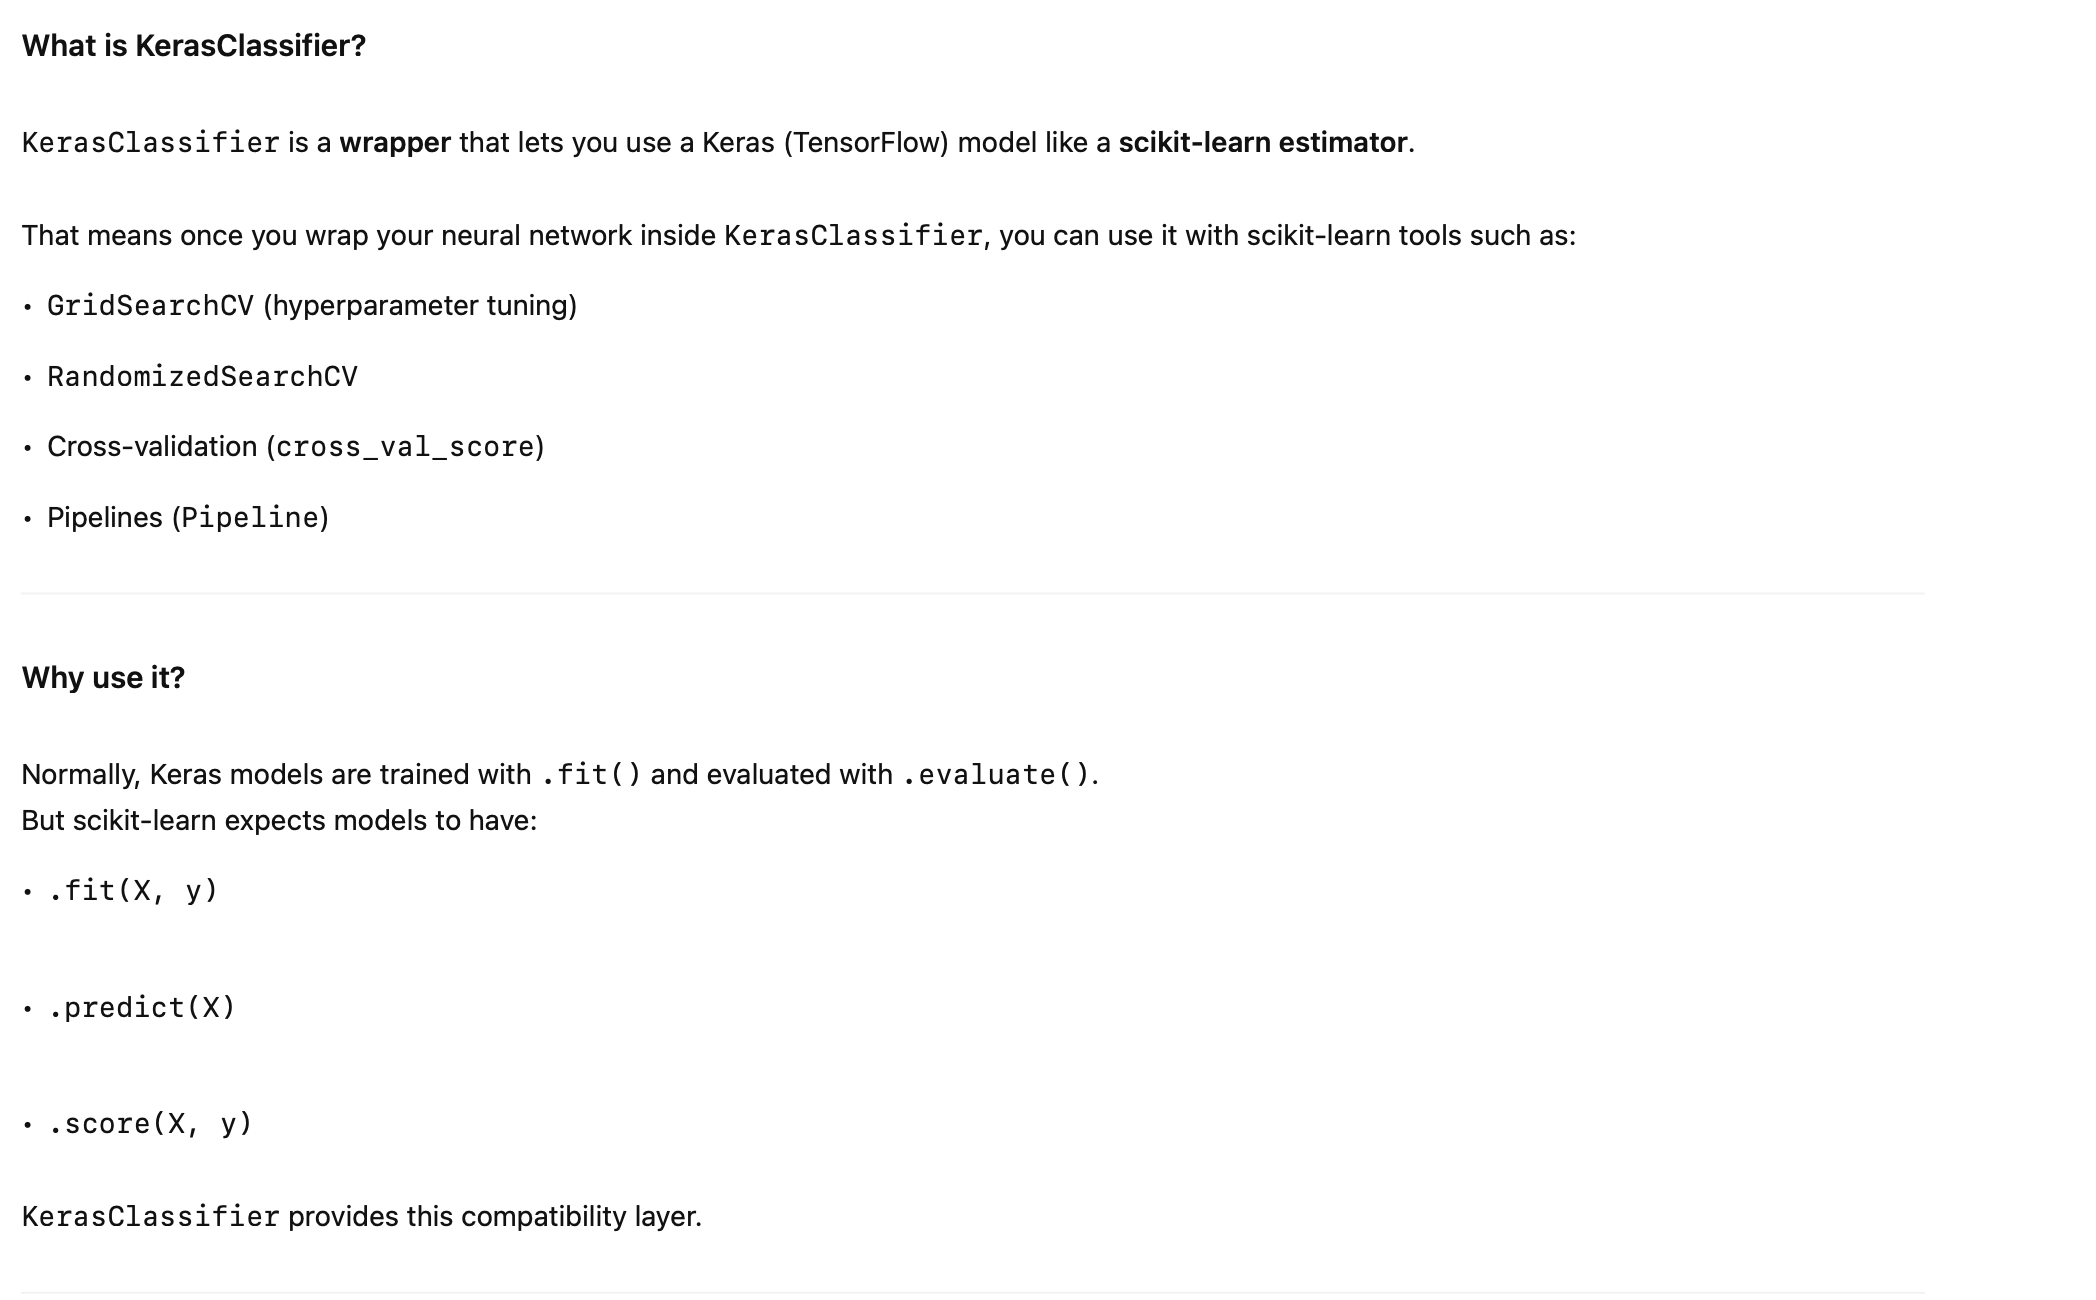

In [7]:

# Define the grid search parameters
param_grid = {
    'neurons': [16, 32, 64, 128],
    'layers': [1, 2],
    'epochs': [50, 100]
}

In [8]:
# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3,verbose=1)
grid_result = grid.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.5014 - loss: 0.7459  
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6026 - loss: 0.6566
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7625 - loss: 0.5389
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6310 - loss: 0.6575    
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6394 - loss: 0.6214
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6792 - loss: 0.6019
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6997 - loss: 0.61653
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6170 - loss: 0.6473
 43/167 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7685 - loss: 0.5125 Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8020 - loss: 0.4863
Epoc